# Assignment Overview


## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

In [171]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler

In [172]:
# Load the data
df_customer = pd.read_csv('ABC_df_customer.csv')
df_demographic = pd.read_csv('ABC_df_demographic.csv')
df_termination = pd.read_csv('ABC_df_termination.csv')

print(len(df_customer))
print(len(df_demographic))
print(len(df_termination))

<ipython-input-172-775b413ee270>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer = pd.read_csv('ABC_df_customer.csv')


2303124
2112579
269259


## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.

#### Q1.1.1 merging data

In [173]:
# Merge the data to keep individuals with demographic data
df = df_customer.merge(df_demographic, on='INDIVIDUAL_ID', how='inner').merge(df_termination, on='INDIVIDUAL_ID', how='left')
customer_length = len(df_customer)
demographic_length = len(df_demographic)
merged_length = len(df)

print(f"The length of the customer data is {customer_length}, the length of the demographic data is {demographic_length}, and the length of the merged data is {merged_length}.")

The length of the customer data is 2303124, the length of the demographic data is 2112579, and the length of the merged data is 2133685.


In [174]:
#Checking data types
print(df.dtypes)

Unnamed: 0_x                int64
INDIVIDUAL_ID             float64
ADDRESS_ID                float64
CUST_ORIG_DATE             object
DATE_OF_BIRTH              object
SOCIAL_SECURITY_NUMBER     object
CUST_START_DATE            object
CURR_ANN_AMT_CAR          float64
CURR_ANN_AMT_HEALTH       float64
CURR_ANN_AMT_HOUSE          int64
Unnamed: 0_y                int64
INCOME                    float64
HAS_CHILDREN              float64
LENGTH_OF_RESIDENCE       float64
MARITAL_STATUS             object
HOME_MARKET_VALUE          object
HOME_OWNER                  int64
COLLEGE_DEGREE              int64
GOOD_CREDIT                 int64
ADVANCED_STUDIES           object
Unnamed: 0                float64
SUSPD_DATE                 object
dtype: object


In [175]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis=1)

In [176]:
# Checking for duplicates
duplicate_count = df.duplicated().sum()
print(f"The number of duplicates in the DataFrame is: {duplicate_count}")

# Checking for duplicates in INDIVIDUAL_ID
duplicate_count = df['INDIVIDUAL_ID'].duplicated().sum()
print(f"The number of duplicates in the INDIVIDUAL_ID column is: {duplicate_count}")

The number of duplicates in the DataFrame is: 0
The number of duplicates in the INDIVIDUAL_ID column is: 21130


In [177]:
# Dropping duplicates to keep only one row per individual
df.drop_duplicates(subset='INDIVIDUAL_ID', inplace=True)
print(len(df))

2112555


In [178]:
# Taking a look at the data
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,2.0,15.0,Married,50000 - 74999,1,1,1,N,NaN
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,0.0,2.0,Single,50000 - 74999,1,0,0,N,NaN
2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,0.0,10.0,Married,75000 - 99999,1,0,0,N,NaN
3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,2.0,6.0,Married,175000 - 199999,1,0,1,N,2021-12-22
4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,1.0,4.0,Married,225000 - 249999,1,1,1,Y,NaN


### Q1.1.2 Missing values

In [179]:
# Checking for missing values
print(df.isnull().sum())

INDIVIDUAL_ID                   0
ADDRESS_ID                      0
CUST_ORIG_DATE                  0
DATE_OF_BIRTH                   0
SOCIAL_SECURITY_NUMBER          0
CUST_START_DATE             63342
CURR_ANN_AMT_CAR                0
CURR_ANN_AMT_HEALTH             0
CURR_ANN_AMT_HOUSE              0
INCOME                          0
HAS_CHILDREN                    0
LENGTH_OF_RESIDENCE             0
MARITAL_STATUS             431646
HOME_MARKET_VALUE          190204
HOME_OWNER                      0
COLLEGE_DEGREE                  0
GOOD_CREDIT                     0
ADVANCED_STUDIES                0
SUSPD_DATE                1865803
dtype: int64


In [180]:
# Number and percentage of missing values according to columns
{col: [df[col].isnull().sum(), f'% {np.round(np.mean(df[col].isnull()*100), 3)}'
      ] for col in df.columns if df[col].isnull().any()}

{'CUST_START_DATE': [63342, '% 2.998'],
 'MARITAL_STATUS': [431646, '% 20.432'],
 'HOME_MARKET_VALUE': [190204, '% 9.004'],
 'SUSPD_DATE': [1865803, '% 88.32']}

<Axes: >

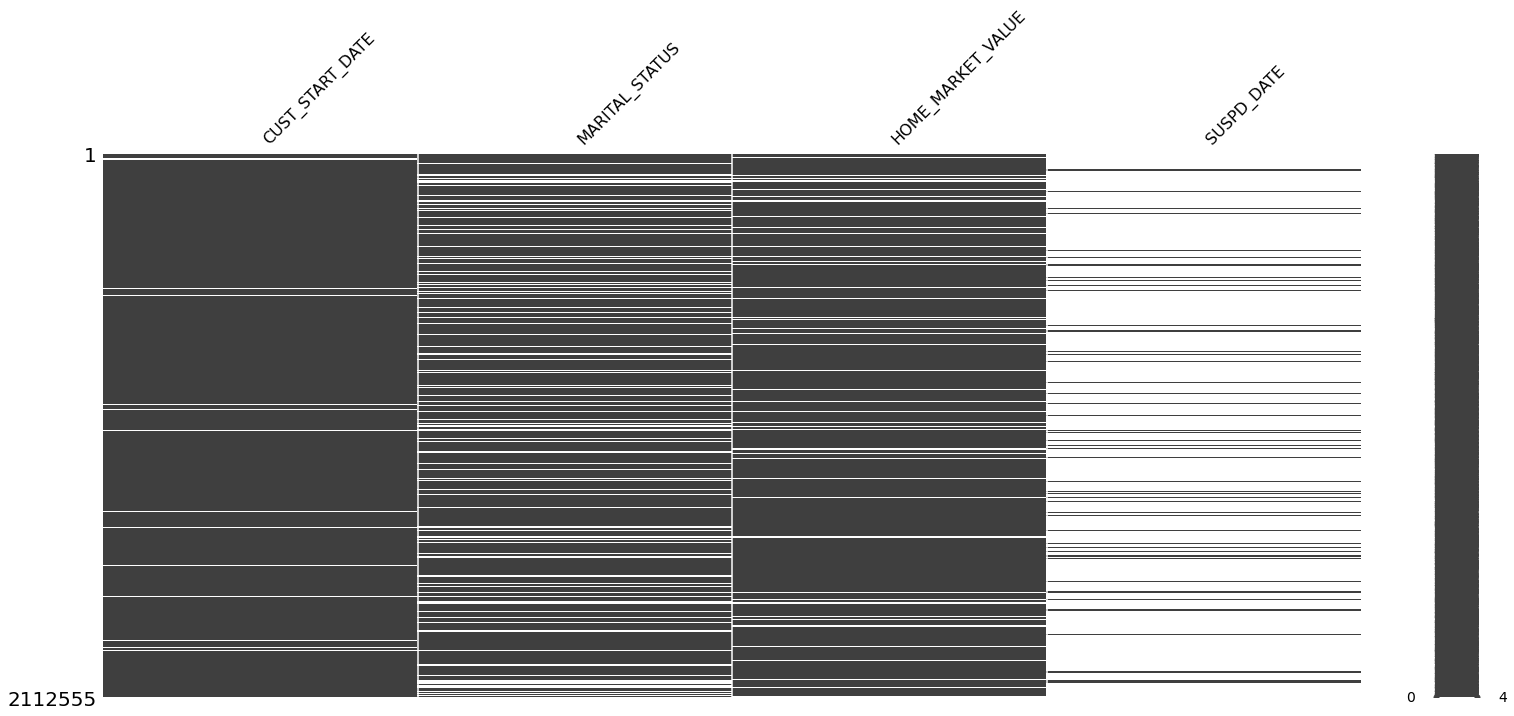

In [181]:
# Visuealize the missing values to discover patterns
msno.matrix(df[['CUST_START_DATE', 'MARITAL_STATUS','HOME_MARKET_VALUE', 'SUSPD_DATE']])

<Axes: >

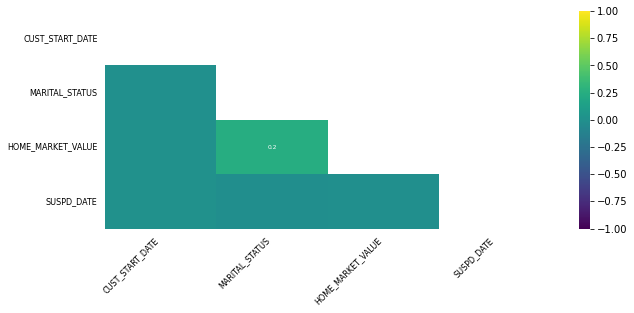

In [182]:
# Visualize the correlation between missing values
msno.heatmap(df, figsize=(10,4), cmap="viridis", fontsize=8)
# No correlation between missing values

In [183]:
# Asessing if home ownership is causing the missing values in home market value. The answer is no.
print('-------------------')
unique_values_1 = df[df['HOME_OWNER'] == 1]['HOME_MARKET_VALUE'].unique()
print(unique_values_1)
print('-------------------')
unique_values_0 = df[df['HOME_OWNER'] == 0]['HOME_MARKET_VALUE'].unique()
print(unique_values_0)
print('-------------------')

-------------------
['50000 - 74999' '75000 - 99999' '175000 - 199999' '225000 - 249999'
 '125000 - 149999' '100000 - 124999' '25000 - 49999' '200000 - 224999'
 '150000 - 174999' nan '275000 - 299999' '250000 - 274999'
 '400000 - 449999' '300000 - 349999' '1000000 Plus' '1000 - 24999'
 '750000 - 999999' '350000 - 399999' '500000 - 749999' '450000 - 499999']
-------------------
['50000 - 74999' nan '150000 - 174999' '250000 - 274999' '75000 - 99999'
 '200000 - 224999' '125000 - 149999' '100000 - 124999' '400000 - 449999'
 '275000 - 299999' '300000 - 349999' '1000 - 24999' '175000 - 199999'
 '25000 - 49999' '225000 - 249999' '350000 - 399999' '500000 - 749999'
 '450000 - 499999' '750000 - 999999' '1000000 Plus']
-------------------


In [184]:
unique_values = df['MARITAL_STATUS'].unique()
print(unique_values)

['Married' 'Single' nan]


In [185]:
# Suspension is not the cause of missing CUST_START_DATE
missing_start_date = df[df['CUST_START_DATE'].isnull()][['CUST_START_DATE', 'SUSPD_DATE']]
missing_start_date.head(10)

,CUST_START_DATE,SUSPD_DATE
32,NaN,NaN
72,NaN,NaN
81,NaN,NaN
108,NaN,NaN
124,NaN,NaN
179,NaN,NaN
252,NaN,2025-11-08
279,NaN,NaN
293,NaN,NaN
296,NaN,NaN


In [186]:
filtered_cust_start_date = df[df['SUSPD_DATE'].notnull()][['CUST_START_DATE', 'SUSPD_DATE']]
filtered_cust_start_date.head(10)

,CUST_START_DATE,SUSPD_DATE
3,2022-07-25,2021-12-22
8,2017-02-24,2022-12-01
10,2022-09-13,2022-09-16
16,2022-09-13,2022-06-12
25,2007-06-10,2021-12-20
37,2022-03-20,2022-03-12
64,2017-07-21,2021-12-29
78,2010-12-01,2022-06-12
92,2017-06-03,2022-05-19
97,2022-06-24,2022-01-28


### Q1.1.3 Dates

In [187]:
# Convert date variables to datetime format
df['CUST_ORIG_DATE'] = pd.to_datetime(df['CUST_ORIG_DATE'])
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df['CUST_START_DATE'] = pd.to_datetime(df['CUST_START_DATE'])
df['SUSPD_DATE'] = pd.to_datetime(df['SUSPD_DATE'])

# Create a dataframe to store the min and max values
date_range_df = pd.DataFrame(columns=['Variable', 'Min', 'Max'])

# Calculate the min and max values for each date variable
date_range_df.loc[0] = ['CUST_ORIG_DATE', df['CUST_ORIG_DATE'].min(), df['CUST_ORIG_DATE'].max()]
date_range_df.loc[1] = ['DATE_OF_BIRTH', df['DATE_OF_BIRTH'].min(), df['DATE_OF_BIRTH'].max()]
date_range_df.loc[2] = ['CUST_START_DATE', df['CUST_START_DATE'].min(), df['CUST_START_DATE'].max()]
date_range_df.loc[3] = ['SUSPD_DATE', df['SUSPD_DATE'].min(), df['SUSPD_DATE'].max()]

# Print the dataframe to make a sense check
date_range_df

,Variable,Min,Max
0,CUST_ORIG_DATE,2005-09-11,2022-11-12
1,DATE_OF_BIRTH,1908-12-11,1999-06-19
2,CUST_START_DATE,1985-09-16,2041-10-28
3,SUSPD_DATE,2019-12-10,2026-12-01


In [188]:
filtered_df_customer = df[(df['CUST_START_DATE'] > '2024-01-01') | (df['SUSPD_DATE'] > '2024-01-01')]
filtered_df_customer

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE
12,2.213031e+11,5.213013e+11,2018-07-10,1967-07-07,777-XX-2081,2030-07-07,1090.958704,94.638079,349,105000.000,0.0,0.000,NaN,NaN,0,0,1,N,NaT
15,2.213021e+11,5.213008e+11,2022-08-17,1990-05-20,277-XX-1871,2032-08-14,1069.838274,562.170313,347,120558.264,0.0,6.801,NaN,150000 - 174999,0,1,1,N,NaT
17,2.213014e+11,5.213005e+11,2022-07-05,1963-11-28,551-XX-2401,2029-07-03,1341.021870,496.314161,428,86250.000,0.0,11.000,Single,150000 - 174999,0,0,1,N,NaT
29,2.213006e+11,5.213002e+11,2021-02-08,1914-05-09,574-XX-3902,2034-02-05,1385.991042,511.585785,401,187500.000,1.0,4.000,Married,75000 - 99999,1,0,1,Y,NaT
38,2.213007e+11,5.213003e+11,2021-03-27,1986-04-21,719-XX-7619,2030-03-25,1462.944213,431.510940,469,131250.000,0.0,15.000,Married,100000 - 124999,1,1,1,N,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133363,2.213001e+11,5.213000e+11,2022-09-20,1985-02-19,551-XX-6574,2035-09-17,1095.476540,646.471472,334,131250.000,0.0,3.000,Single,100000 - 124999,1,0,1,N,NaT
2133409,2.213020e+11,5.213007e+11,2005-09-11,1948-05-01,830-XX-5180,2024-09-06,1411.076311,476.811140,424,56250.000,0.0,15.000,Married,75000 - 99999,1,0,1,N,NaT
2133523,2.213029e+11,5.213011e+11,2019-08-16,1967-07-07,386-XX-5787,2032-08-12,1328.830625,301.261473,376,120558.264,0.0,1.000,NaN,75000 - 99999,1,0,1,N,2022-11-10
2133664,2.213030e+11,5.213012e+11,2022-07-15,1966-07-27,646-XX-6005,2034-07-12,1498.893235,409.106036,444,86250.000,1.0,5.000,Single,25000 - 49999,1,0,1,N,NaT


In [189]:
#Drop the rows with the incorrect dates
print(len(df))
# Define the cutoff date
cutoff_date = pd.to_datetime('2024-01-01')

# Drop rows based on the condition
df = df.drop(df[(df['CUST_START_DATE'] > cutoff_date) | (df['SUSPD_DATE'] > cutoff_date)].index)

print(len(df))

2112555
2075771


In [190]:
# Create a dataframe to store the min and max values
date_range_df = pd.DataFrame(columns=['Variable', 'Min', 'Max'])

# Calculate the min and max values for each date variable
date_range_df.loc[0] = ['CUST_ORIG_DATE', df['CUST_ORIG_DATE'].min(), df['CUST_ORIG_DATE'].max()]
date_range_df.loc[1] = ['DATE_OF_BIRTH', df['DATE_OF_BIRTH'].min(), df['DATE_OF_BIRTH'].max()]
date_range_df.loc[2] = ['CUST_START_DATE', df['CUST_START_DATE'].min(), df['CUST_START_DATE'].max()]
date_range_df.loc[3] = ['SUSPD_DATE', df['SUSPD_DATE'].min(), df['SUSPD_DATE'].max()]

# Print the dataframe, now it looks better
date_range_df

,Variable,Min,Max
0,CUST_ORIG_DATE,2005-09-11,2022-11-12
1,DATE_OF_BIRTH,1908-12-11,1999-06-19
2,CUST_START_DATE,1985-09-16,2024-01-01
3,SUSPD_DATE,2019-12-10,2024-01-01


In [191]:
count = len(df[df['CUST_START_DATE'] > df['SUSPD_DATE']])
print(count)

67586


In [192]:
# Suspicious, however I will not drop the rows since the low number of suspended accounts, possibly these clients started
# new policies after the suspension
selected_rows = df[df['CUST_START_DATE'] > df['SUSPD_DATE']][['CUST_START_DATE', 'SUSPD_DATE']]
print(selected_rows)

        CUST_START_DATE SUSPD_DATE
3            2022-07-25 2021-12-22
16           2022-09-13 2022-06-12
37           2022-03-20 2022-03-12
97           2022-06-24 2022-01-28
102          2022-09-29 2022-01-15
...                 ...        ...
2133496      2022-09-13 2022-08-30
2133549      2022-07-21 2022-03-09
2133570      2022-07-05 2022-06-23
2133610      2022-09-01 2022-07-28
2133667      2022-08-26 2021-12-23

[67586 rows x 2 columns]


In [193]:
# Check again for missing values
{col: [df[col].isnull().sum(), f'% {np.round(np.mean(df[col].isnull()*100), 3)}'
      ] for col in df.columns if df[col].isnull().any()}

{'CUST_START_DATE': [63205, '% 3.045'],
 'MARITAL_STATUS': [423043, '% 20.38'],
 'HOME_MARKET_VALUE': [186481, '% 8.984'],
 'SUSPD_DATE': [1838544, '% 88.572']}

### Q1.1.4 Numeric variables

In [194]:
# Create a new variable to store the customer value for later modeling
df['CUS_VALUE'] = df['CURR_ANN_AMT_CAR'] + df['CURR_ANN_AMT_HEALTH'] + df['CURR_ANN_AMT_HOUSE']
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE,CUS_VALUE
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,2.0,15.0,Married,50000 - 74999,1,1,1,N,NaT,2247.877314
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,0.0,2.0,Single,50000 - 74999,1,0,0,N,NaT,2446.616961
2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,0.0,10.0,Married,75000 - 99999,1,0,0,N,NaT,2611.024422
3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,2.0,6.0,Married,175000 - 199999,1,0,1,N,2021-12-22,2356.927051
4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,1.0,4.0,Married,225000 - 249999,1,1,1,Y,NaT,2423.490716


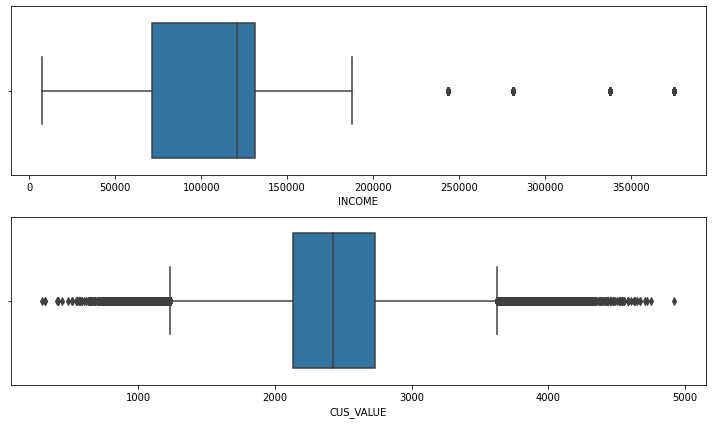

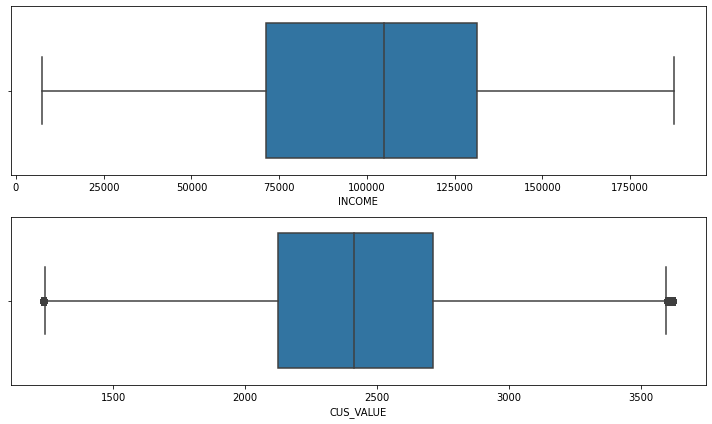

Length of the dataframe with outliers: 2075771
Length of the dataframe without outliers: 1926327


In [195]:
# Create boxplots of INCOME and CUS_VALUE
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='INCOME')
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='CUS_VALUE')
plt.tight_layout()
plt.show()

# Identify outliers using the IQR method
Q1_income = df['INCOME'].quantile(0.25)
Q3_income = df['INCOME'].quantile(0.75)
IQR_income = Q3_income - Q1_income
df['INCOME_OUTLIER'] = np.where((df['INCOME'] < Q1_income - 1.5 * IQR_income) | (df['INCOME'] > Q3_income + 1.5 * IQR_income), 1, 0)

Q1_cus_value = df['CUS_VALUE'].quantile(0.25)
Q3_cus_value = df['CUS_VALUE'].quantile(0.75)
IQR_cus_value = Q3_cus_value - Q1_cus_value
df['CUS_VALUE_OUTLIER'] = np.where((df['CUS_VALUE'] < Q1_cus_value - 1.5 * IQR_cus_value) | (df['CUS_VALUE'] > Q3_cus_value + 1.5 * IQR_cus_value), 1, 0)

# Filter out the outliers
df_filtered = df[(df['INCOME_OUTLIER'] == 0) & (df['CUS_VALUE_OUTLIER'] == 0)]

# Create boxplots again after filtering out the outliers
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(data=df_filtered, x='INCOME')
plt.subplot(2, 1, 2)
sns.boxplot(data=df_filtered, x='CUS_VALUE')
plt.tight_layout()
plt.show()

# Print the length of the dataframe with and without the outliers
print(f"Length of the dataframe with outliers: {len(df)}")
print(f"Length of the dataframe without outliers: {len(df_filtered)}")


In [196]:
# Filter out the outliers, because the change in length is not drastic
df = df[(df['INCOME_OUTLIER'] == 0) & (df['CUS_VALUE_OUTLIER'] == 0)]
# Drop the outlier indicator columns
df = df.drop(['INCOME_OUTLIER', 'CUS_VALUE_OUTLIER'], axis=1)


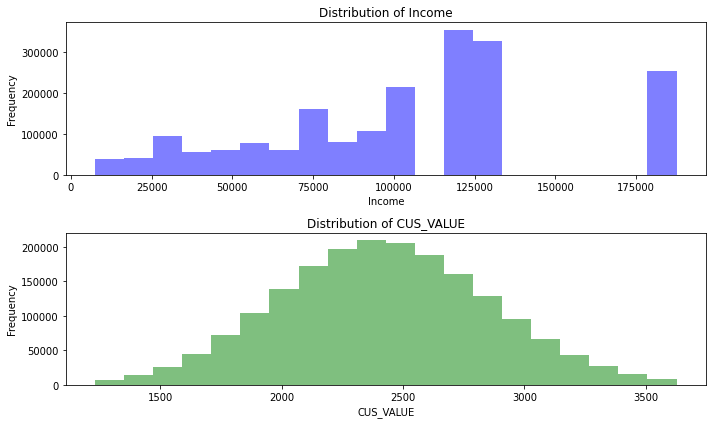

In [197]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(df['INCOME'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

plt.subplot(2, 1, 2)
plt.hist(df['CUS_VALUE'], bins=20, color='green', alpha=0.5)
plt.xlabel('CUS_VALUE')
plt.ylabel('Frequency')
plt.title('Distribution of CUS_VALUE')

plt.tight_layout()
plt.show()

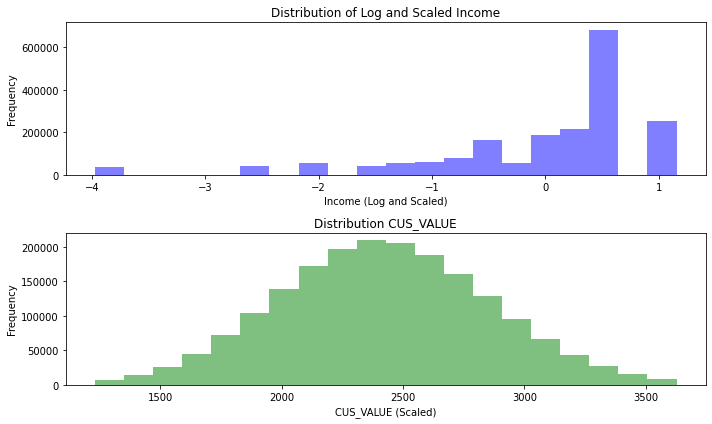

In [198]:

# Take the logarithm of the 'INCOME' column to bring it closer to a normal distribution
df['INCOME'] = np.log(df['INCOME'])

# Select the variables to be scaled
variables_to_scale = ['INCOME']

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected variables
scaler.fit(df[variables_to_scale])

# Transform the selected variables using the scaler to match the scale of other numeric variables
df[variables_to_scale] = scaler.transform(df[variables_to_scale])

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(df['INCOME'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Income (Log and Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Log and Scaled Income')

plt.subplot(2, 1, 2)
plt.hist(df['CUS_VALUE'], bins=20, color='green', alpha=0.5)
plt.xlabel('CUS_VALUE (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution CUS_VALUE')

plt.tight_layout()
plt.show()

Min value of LENGTH_OF_RESIDENCE: 0.0
Max value of LENGTH_OF_RESIDENCE: 15.0
Min value of HAS_CHILDREN: 0.0
Max value of HAS_CHILDREN: 6.0


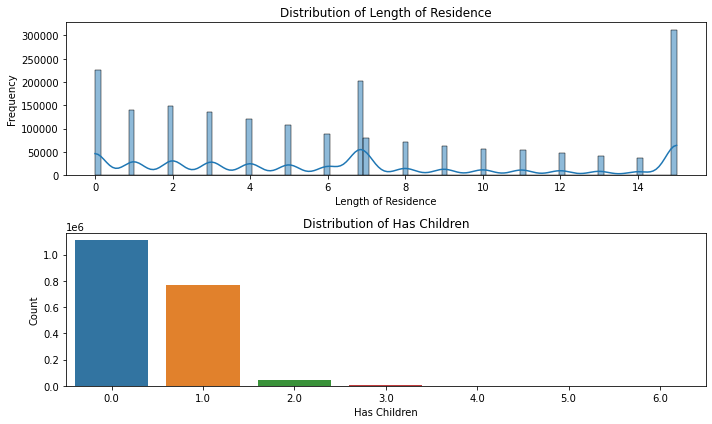

In [199]:
# Calculate the min and max values for length of residence and has children columns
length_of_residence_min = df['LENGTH_OF_RESIDENCE'].min()
length_of_residence_max = df['LENGTH_OF_RESIDENCE'].max()
has_children_min = df['HAS_CHILDREN'].min()
has_children_max = df['HAS_CHILDREN'].max()

# Print the min and max values to make sure they are within the expected range
print(f"Min value of LENGTH_OF_RESIDENCE: {length_of_residence_min}")
print(f"Max value of LENGTH_OF_RESIDENCE: {length_of_residence_max}")
print(f"Min value of HAS_CHILDREN: {has_children_min}")
print(f"Max value of HAS_CHILDREN: {has_children_max}")

# Plot the distribution of length of residence and has children columns
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x='LENGTH_OF_RESIDENCE', kde=True)
plt.xlabel('Length of Residence')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Residence')

plt.subplot(2, 1, 2)
sns.countplot(data=df, x='HAS_CHILDREN')
plt.xlabel('Has Children')
plt.ylabel('Count')
plt.title('Distribution of Has Children')

plt.tight_layout()
plt.show()

In [200]:
from sklearn.preprocessing import StandardScaler

# Select the variables to be scaled
variables_to_scale = ['LENGTH_OF_RESIDENCE', 'HAS_CHILDREN']

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected variables to match the scale of other numeric variables
scaler.fit(df[variables_to_scale])

# Transform the selected variables using the scaler
df[variables_to_scale] = scaler.transform(df[variables_to_scale])

### Q1.1.5 Other features

In [201]:
# Replace Y and N with 1 and 0
df['ADVANCED_STUDIES'] = df['ADVANCED_STUDIES'].replace({'Y': 1, 'N': 0})

In [202]:
# Create a flag for suspended accounts
df['SUSPD_FLAG'] = df['SUSPD_DATE'].notna().astype(int)

In [203]:
# Create a flag for married and single clients
df = pd.get_dummies(df, columns=['MARITAL_STATUS'], dummy_na=True)
df[['MARITAL_STATUS_Married', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_nan']] = df[['MARITAL_STATUS_Married', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_nan']].astype(int)

In [204]:
from sklearn.preprocessing import OneHotEncoder

# Indicate missing values in the HOME_MARKET_VALUE column with a string
df['HOME_MARKET_VALUE'].fillna('Missing', inplace=True)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape the HOME_MARKET_VALUE column to a 2D array
home_market_value = df['HOME_MARKET_VALUE'].values.reshape(-1, 1)

# Fit and transform the HOME_MARKET_VALUE column using the encoder
encoded_home_market_value = encoder.fit_transform(home_market_value)

# Create a dataframe from the encoded values
encoded_df = pd.DataFrame(encoded_home_market_value, columns=encoder.get_feature_names_out(['HOME_MARKET_VALUE']))

# Reset the index of df and encoded_df before concatenating
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the encoded dataframe with the original dataframe
df = pd.concat([df, encoded_df], axis=1)

# Drop the original HOME_MARKET_VALUE column
df = df.drop('HOME_MARKET_VALUE', axis=1)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [205]:
# Find the earliest date in the CUST_ORIG_DATE column
earliest_cust_orig_date = df['CUST_ORIG_DATE'].min()

# Find the earliest date in the DATE_OF_BIRTH column
earliest_date_of_birth = df['DATE_OF_BIRTH'].min()

# Convert the CUST_ORIG_DATE column to the number of days since the earliest date
df['CUST_ORIG_DATE'] = (df['CUST_ORIG_DATE'] - earliest_cust_orig_date).dt.days

# Calculate the age in years
df['AGE'] = (pd.to_datetime('2024-02-26') - df['DATE_OF_BIRTH']).dt.days // 365

# Convert the DATE_OF_BIRTH column to the number of days since the earliest date
df['DATE_OF_BIRTH'] = (df['DATE_OF_BIRTH'] - earliest_date_of_birth).dt.days

# Print the updated dataframe
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,...,HOME_MARKET_VALUE_300000 - 349999,HOME_MARKET_VALUE_350000 - 399999,HOME_MARKET_VALUE_400000 - 449999,HOME_MARKET_VALUE_450000 - 499999,HOME_MARKET_VALUE_50000 - 74999,HOME_MARKET_VALUE_500000 - 749999,HOME_MARKET_VALUE_75000 - 99999,HOME_MARKET_VALUE_750000 - 999999,HOME_MARKET_VALUE_Missing,AGE
0,2.213000e+11,5.213000e+11,4837,25396,608-XX-7640,2018-12-09,1318.877997,517.999317,411,-1.576141,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45
1,2.213001e+11,5.213001e+11,4496,15145,342-XX-6908,2018-01-02,1474.199182,558.417779,414,-1.256216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,73
2,2.213007e+11,5.213002e+11,1473,21392,240-XX-9224,2009-09-23,1467.375112,701.649310,442,-0.562196,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56
3,2.213016e+11,5.213006e+11,6161,22080,775-XX-6249,2022-07-25,1492.409561,401.517490,463,1.157730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,2.213016e+11,5.213006e+11,395,23299,629-XX-7298,2006-10-11,1284.633494,772.857222,366,0.589090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51


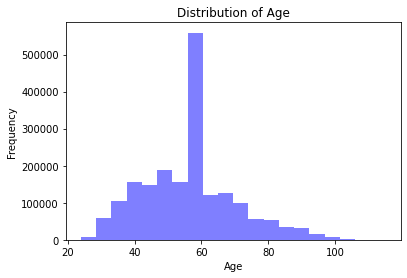

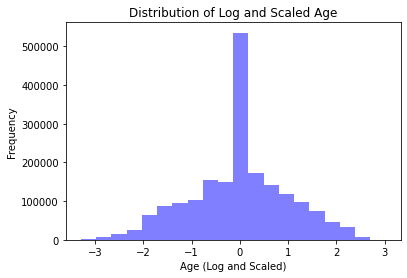

In [206]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.hist(df['AGE'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Take the logarithm of the 'AGE' column to bring it closer to a normal distribution
df['AGE'] = np.log(df['AGE'])

# Select the variable to be scaled
variable_to_scale = ['AGE']

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected variable to match the scale of other numeric variables
scaler.fit(df[variable_to_scale])

# Transform the selected variable using the scaler
df[variable_to_scale] = scaler.transform(df[variable_to_scale])

plt.hist(df['AGE'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Age (Log and Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Log and Scaled Age')
plt.show()




In [207]:
# Create bins for every year
bins = pd.date_range(start=df['CUST_START_DATE'].min(), end=df['CUST_START_DATE'].max(), freq='Y')

# Create labels for the bins
labels = [f'Year_{i}' for i in range(len(bins)-1)]

# Bin up the CUST_START_DATE column
df['CUST_START_DATE_BINNED'] = pd.cut(df['CUST_START_DATE'], bins=bins, labels=labels, include_lowest=True)

# One-hot encode the binned column
df_encoded = pd.get_dummies(df['CUST_START_DATE_BINNED'], prefix='CUST_START_DATE').astype(int)

# Concatenate the encoded dataframe with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original CUST_START_DATE and CUST_START_DATE_BINNED columns
df = df.drop(['CUST_START_DATE', 'CUST_START_DATE_BINNED'], axis=1)

# Print the updated dataframe
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,...,CUST_START_DATE_Year_28,CUST_START_DATE_Year_29,CUST_START_DATE_Year_30,CUST_START_DATE_Year_31,CUST_START_DATE_Year_32,CUST_START_DATE_Year_33,CUST_START_DATE_Year_34,CUST_START_DATE_Year_35,CUST_START_DATE_Year_36,CUST_START_DATE_Year_37
0,2.213000e+11,5.213000e+11,4837,25396,608-XX-7640,1318.877997,517.999317,411,-1.576141,2.643105,...,0,0,0,0,1,0,0,0,0,0
1,2.213001e+11,5.213001e+11,4496,15145,342-XX-6908,1474.199182,558.417779,414,-1.256216,-0.786342,...,0,0,0,0,1,0,0,0,0,0
2,2.213007e+11,5.213002e+11,1473,21392,240-XX-9224,1467.375112,701.649310,442,-0.562196,-0.786342,...,0,0,0,0,0,0,0,0,0,0
3,2.213016e+11,5.213006e+11,6161,22080,775-XX-6249,1492.409561,401.517490,463,1.157730,2.643105,...,0,0,0,0,0,0,0,0,1,0
4,2.213016e+11,5.213006e+11,395,23299,629-XX-7298,1284.633494,772.857222,366,0.589090,0.928381,...,0,0,0,0,0,0,0,0,0,0


**Justification of data cleaning and feature engineering**

**Merging the data**

I merged the separate datasets to have all the information together. I used an inner join when merging the customer table to the demographic data table to only keep individuals with sufficient data for modelling. I used right join while merging this data to the termination dataset to keep the information on both group of customer (terminated vs not terminated). After the joins, I dropped the three “Unnamed” column, because these were lacking useful information. This way I achieved a dataset **2 133 685** rows long, compared to **2 303 124** in the original customers dataset.

**Dropping duplicates**

I checked for duplicate values in the whole dataset and in the INDIVIDUAL_ID column. I dropped the duplicates to only keep one row per customer, and avoid bias.

**Missing data**

To asess the quality of the data, I calculated the number and percentage of missing data in each column. The very high percentage of missing values in SUSPD_DATE column is natural, due to the fact, that the majority of accounts are not suspended. After looking at correlations between the missing values in different column, and other possible reasons to missing values (for example, not owning a home is not the cause of missing home value), I uncovered that the issue is purely data quality. However, I decided to not drop the rows containing these missing values, due to their quite high proportion in the data. Missing values were encoded as a category for each variable during feature engineering. Handling missing data is critical as it prevents bias, loss of valuable information, and distorted relationships in analysis. Incorrectly addressing missing values, such as dropping them without consideration, can lead to skewed conclusions, reduced representativeness, loss of information and compromised model performance.

**Dates**

To work with the dates present in the dataset, it was necessary to convert them to datetime format. This was followed by a sense check, where I deleted rows with dates from the future (the cutoff date was 2024-01-01). Related to dates, in the case of DATE_OF_BIRTH and CUST_ORIG_DATE, I converted them to number of days since the earliest day appearing in the column. I also added the age of customers in years, I took the log of this value and applied standard scaling for better modeling performance. Due to many missing values, I used binning to years and one hot encoding to store CUST_START_DATE. Converting dates to datetime format and performing a sense check by removing rows with future dates ensures data consistency and avoids unrealistic temporal values. Additionally, transforming DATE_OF_BIRTH and CUST_ORIG_DATE into numerical representations allows for meaningful age calculations, while handling missing values through binning and one-hot encoding enhances the dataset's suitability for analysis.

**Numeric variables**

In the calculated customer value (target variable) and income variable, I identified and dropped outliers. Afterwards, I took the log of income and applied standard scaling, hereby making it closer to normal distribution. I applied standard scaling to length of residence and children count variables as well, after performing a sense check. These numeric transformations enhance the robustness of the model by mitigating the influence of outliers, promoting normality in distributions, and facilitating the interpretation of variable relationships. The standardized scaling also ensures a consistent scale among features, positively impacting the model's performance and stability.

**Other transformations**

I used one hot encoding on advanced studies, marital status and home market value. I transformed the suspension date to a binary variable to indicate the suspended accounts with 1. These transformations enable the incorporation of categorical information into the model, enriching its predictive capabilities. The binary representation of suspension status enhances interpretability.

**Measurable improvement in data quality**

In the end of the data cleaning and feature engineering process, the dataset became only somewhat smaller than originally, but it has no duplicates and missing values. Each column has been converted to be suitable for the modeling phase. The numeric variables are on the same scale, and they are normally distributed or close to normal distribution.

### Q1.1.6 EDA

In [208]:
# Reloading original data for some insights
df_eda = df_customer.merge(df_demographic, on='INDIVIDUAL_ID', how='inner').merge(df_termination, on='INDIVIDUAL_ID', how='left')
# Calculate the age in years
df_eda['DATE_OF_BIRTH'] = pd.to_datetime(df_eda['DATE_OF_BIRTH'])
df_eda['AGE'] = (pd.to_datetime('2024-02-26') - df_eda['DATE_OF_BIRTH']).dt.days // 365
df_eda['CUS_VALUE'] = df_eda['CURR_ANN_AMT_CAR'] + df_eda['CURR_ANN_AMT_HEALTH'] + df_eda['CURR_ANN_AMT_HOUSE']

['CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES', 'CUS_VALUE', 'SUSPD_FLAG', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_nan', 'HOME_MARKET_VALUE_1000 - 24999', 'HOME_MARKET_VALUE_100000 - 124999', 'HOME_MARKET_VALUE_1000000 Plus', 'HOME_MARKET_VALUE_125000 - 149999', 'HOME_MARKET_VALUE_150000 - 174999', 'HOME_MARKET_VALUE_175000 - 199999', 'HOME_MARKET_VALUE_200000 - 224999', 'HOME_MARKET_VALUE_225000 - 249999', 'HOME_MARKET_VALUE_25000 - 49999', 'HOME_MARKET_VALUE_250000 - 274999', 'HOME_MARKET_VALUE_275000 - 299999', 'HOME_MARKET_VALUE_300000 - 349999', 'HOME_MARKET_VALUE_350000 - 399999', 'HOME_MARKET_VALUE_400000 - 449999', 'HOME_MARKET_VALUE_450000 - 499999', 'HOME_MARKET_VALUE_50000 - 74999', 'HOME_MARKET_VALUE_500000 - 749999', 'HOME_MARKET_VALUE_75000 - 99999', 'HOME_MARKET_VALUE_750000 - 9

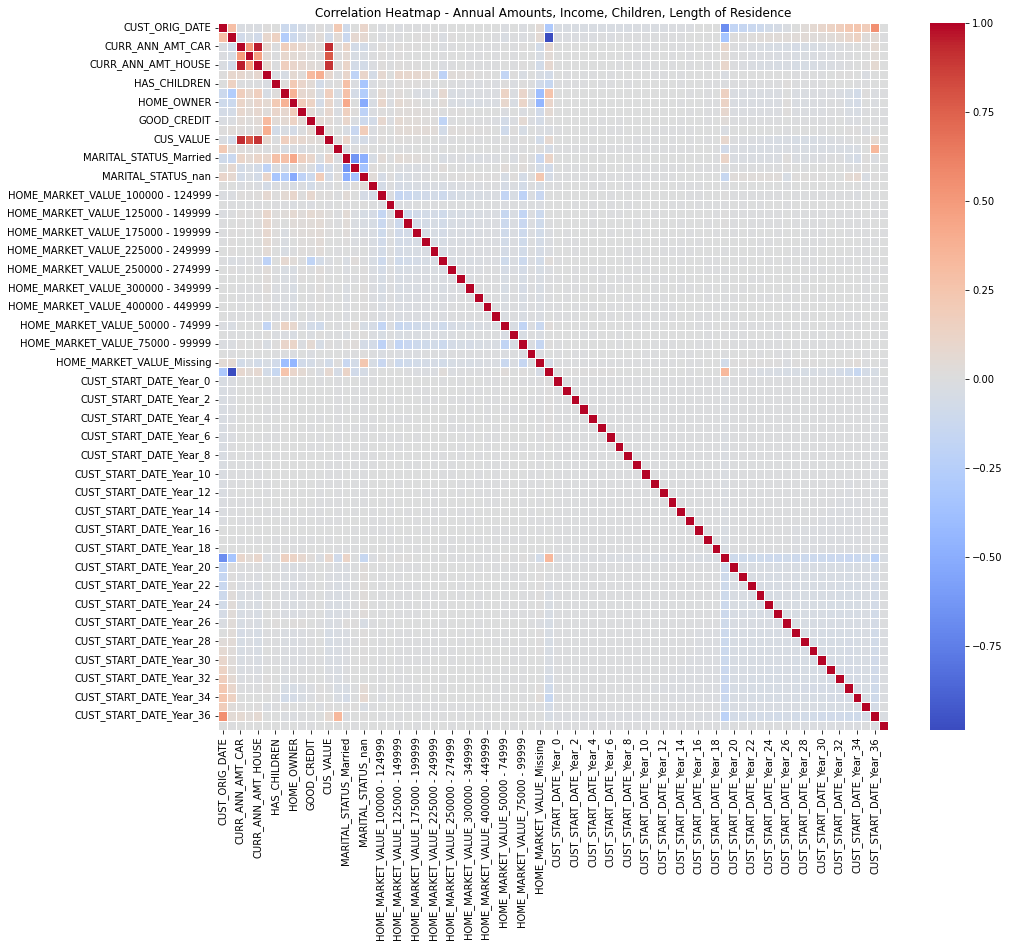

In [209]:
# Create a subset DataFrame with selected columns
subset_df = df.drop(['INDIVIDUAL_ID', 'ADDRESS_ID', 'SOCIAL_SECURITY_NUMBER', 'SUSPD_DATE'], axis=1)
column_names = subset_df.columns.tolist()
print(column_names)


# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot a heatmap for correlation visualization
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - Annual Amounts, Income, Children, Length of Residence')
plt.show()


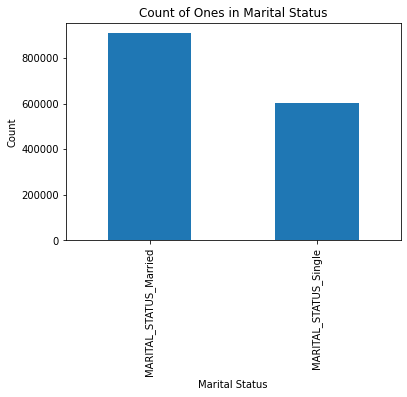

In [210]:
df[['MARITAL_STATUS_Married', 'MARITAL_STATUS_Single']].sum().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Ones in Marital Status')
plt.show()

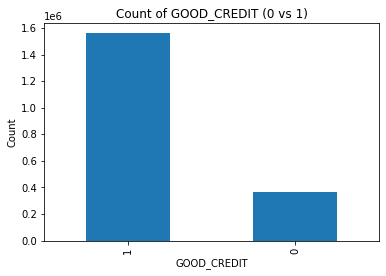

In [211]:
df['GOOD_CREDIT'].value_counts().plot(kind='bar')
plt.xlabel('GOOD_CREDIT')
plt.ylabel('Count')
plt.title('Count of GOOD_CREDIT (0 vs 1)')
plt.show()

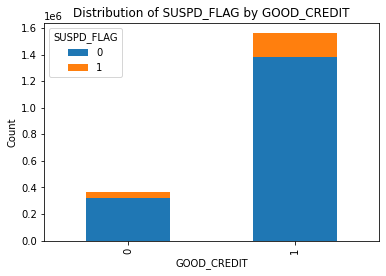

In [212]:

# Create a cross-tabulation of GOOD_CREDIT and SUSPD_FLAG
cross_tab = pd.crosstab(df['GOOD_CREDIT'], df['SUSPD_FLAG'])

# Plot the stacked bar plot
cross_tab.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('GOOD_CREDIT')
plt.ylabel('Count')
plt.title('Distribution of SUSPD_FLAG by GOOD_CREDIT')

# Show the plot
plt.show()

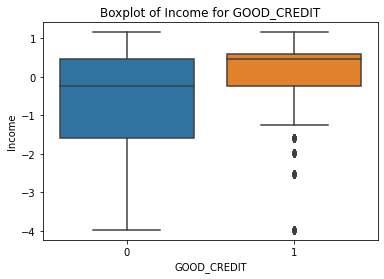

In [213]:
import seaborn as sns

# Create a boxplot of income for GOOD_CREDIT
sns.boxplot(x=df['GOOD_CREDIT'], y=df['INCOME'])
plt.xlabel('GOOD_CREDIT')
plt.ylabel('Income')
plt.title('Boxplot of Income for GOOD_CREDIT')
plt.show()


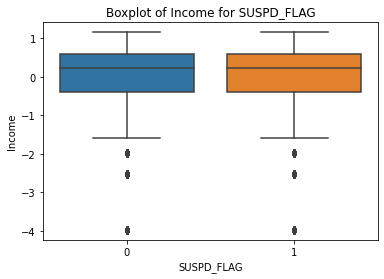

In [214]:
import seaborn as sns

# Create a boxplot of income for suspd_flag
sns.boxplot(x=df['SUSPD_FLAG'], y=df['INCOME'])
plt.xlabel('SUSPD_FLAG')
plt.ylabel('Income')
plt.title('Boxplot of Income for SUSPD_FLAG')
plt.show()

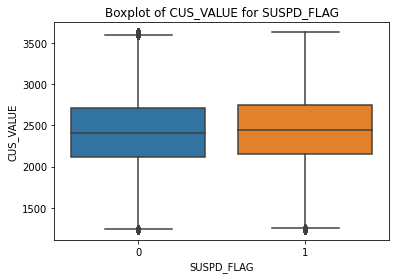

In [215]:
import seaborn as sns

# Create a boxplot of CUS_VALUE for SUSPD_FLAG
sns.boxplot(x=df['SUSPD_FLAG'], y=df['CUS_VALUE'])
plt.xlabel('SUSPD_FLAG')
plt.ylabel('CUS_VALUE')
plt.title('Boxplot of CUS_VALUE for SUSPD_FLAG')
plt.show()

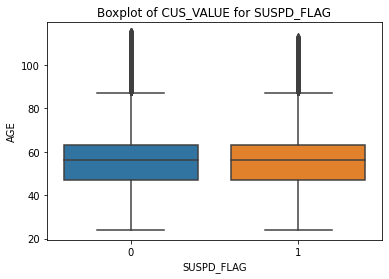

In [216]:
import seaborn as sns

# Create a boxplot of CUS_VALUE for SUSPD_FLAG
sns.boxplot(x=df['SUSPD_FLAG'], y=df_eda['AGE'])
plt.xlabel('SUSPD_FLAG')
plt.ylabel('AGE')
plt.title('Boxplot of CUS_VALUE for SUSPD_FLAG')
plt.show()

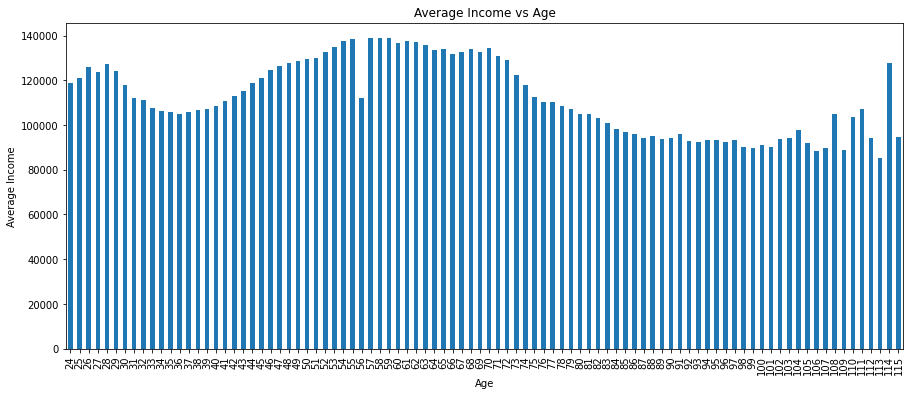

Average Income: 120560.5232754713
Average Age: 56.141149701103956


In [217]:
plt.figure(figsize=(15, 6))  # Adjust the figure size as desired
df_eda.groupby('AGE')['INCOME'].mean().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.title('Average Income vs Age')
plt.show()
average_income = df_eda['INCOME'].mean()
average_age = df_eda['AGE'].mean()

print("Average Income:", average_income)
print("Average Age:", average_age)


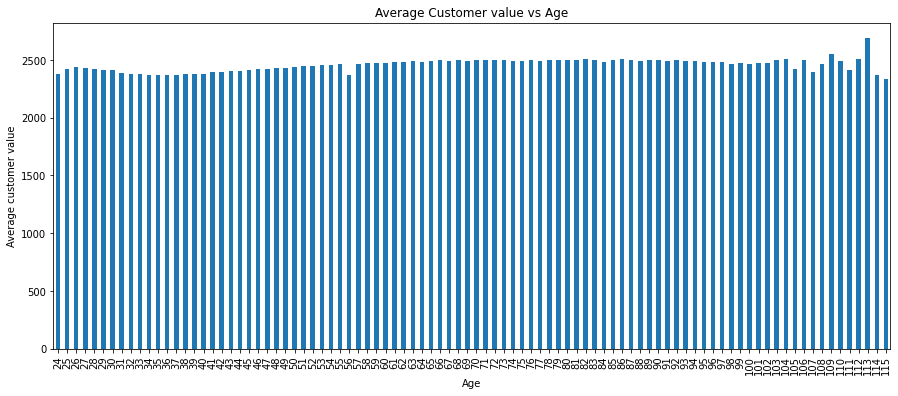

In [218]:
plt.figure(figsize=(15, 6))  # Adjust the figure size as desired
df_eda.groupby('AGE')['CUS_VALUE'].mean().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Average customer value')
plt.title('Average Customer value vs Age')
plt.show()

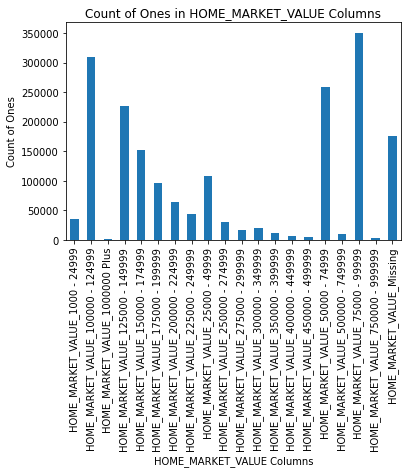

In [219]:
# Get the count of ones in all HOME_MARKET_VALUE... columns
count_of_ones = df.filter(like='HOME_MARKET_VALUE').sum()

# Plot the count of ones as a bar chart
count_of_ones.plot(kind='bar')
plt.xlabel('HOME_MARKET_VALUE Columns')
plt.ylabel('Count of Ones')
plt.title('Count of Ones in HOME_MARKET_VALUE Columns')
plt.show()


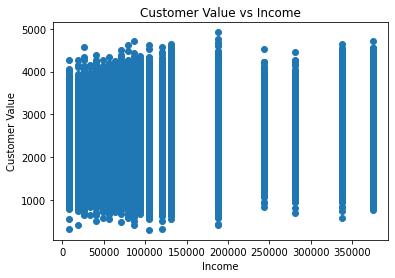

In [220]:
import matplotlib.pyplot as plt

plt.scatter(df_eda['INCOME'], df_eda['CUS_VALUE'])
plt.xlabel('Income')
plt.ylabel('Customer Value')
plt.title('Customer Value vs Income')
plt.show()

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


If we take a look on the correlation heatmap, we can observe, that there are very few meaningful relationships in the dataset, even less when we only consider those, that are relevant for the modeling phase. The 3 different annual amount is obviously well correlated with the customer value, since latter is the sum of these values. Hereby, they can't be involved in the estimation of customer value. No significant correlations are observed with other numerical variables, like income or age. There are also no observable relationships related to SUSPD_FLAG, which would drive customer churn prediction. For example age, income and customer value are highly similar at flagged and not flagged accounts. Suspension is closely as likely at customers with good and bad credit as well. Some general insights to the data are that the average customer is 56 years old, people with good credit and advanced studies tend to have higher income. Also more customers are married.

Connecting these data insights to the business context, it becomes evident that the identified correlations, or lack thereof, have direct implications for ABC Insurance's strategic goals. The absence of significant relationships between key numerical variables and customer churn indicators emphasizes the need for a nuanced approach to understanding customer behavior. While certain demographic attributes such as age, income, and education level may influence customer profiles, their direct impact on churn prediction appears less pronounced. This insight underscores the importance of exploring more nuanced factors or combinations of variables that may drive customer engagement and retention. Additionally, the established general trends, such as the average age of customers and the correlation between good credit and higher income, offer valuable inputs for tailoring marketing strategies and product offerings. As ABC Insurance aims to revitalize its customer engagement strategy and mitigate churn, these data insights serve as a foundation for developing more targeted and effective retention initiatives, aligning with the overarching goal of understanding and meeting the diverse needs of its customer base.

## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics. (15 points)

In [221]:
# Making sure that there is no missing values other than expected
{col: [df[col].isnull().sum(), f'% {np.round(np.mean(df[col].isnull()*100), 3)}'
      ] for col in df.columns if df[col].isnull().any()}

{'SUSPD_DATE': [1705502, '% 88.536']}

In [222]:
# Drop the specified columns from df
model_df = df.drop(['INDIVIDUAL_ID', 'ADDRESS_ID', 'SOCIAL_SECURITY_NUMBER', 'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'SUSPD_DATE'], axis=1)

# List the column names of model_df
column_names = model_df.columns.tolist()

# Print the column names
print(column_names)

['CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES', 'CUS_VALUE', 'SUSPD_FLAG', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_nan', 'HOME_MARKET_VALUE_1000 - 24999', 'HOME_MARKET_VALUE_100000 - 124999', 'HOME_MARKET_VALUE_1000000 Plus', 'HOME_MARKET_VALUE_125000 - 149999', 'HOME_MARKET_VALUE_150000 - 174999', 'HOME_MARKET_VALUE_175000 - 199999', 'HOME_MARKET_VALUE_200000 - 224999', 'HOME_MARKET_VALUE_225000 - 249999', 'HOME_MARKET_VALUE_25000 - 49999', 'HOME_MARKET_VALUE_250000 - 274999', 'HOME_MARKET_VALUE_275000 - 299999', 'HOME_MARKET_VALUE_300000 - 349999', 'HOME_MARKET_VALUE_350000 - 399999', 'HOME_MARKET_VALUE_400000 - 449999', 'HOME_MARKET_VALUE_450000 - 499999', 'HOME_MARKET_VALUE_50000 - 74999', 'HOME_MARKET_VALUE_500000 - 749999', 'HOME_MARKET_VALUE_75000 - 99999', 'HOME_MARKET_VALUE_750000 - 999999', 'HOME_MARKET_VALUE_Missing', 'AGE', 'CUST_START_DATE_Year

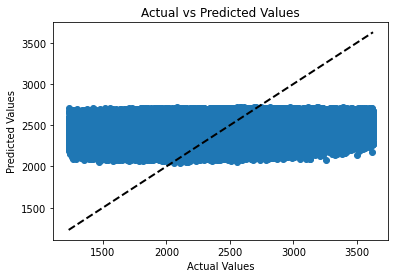

R^2 score: 0.05554313463682736
Mean Squared Error: 173581.7024370558


In [223]:
# Fitting linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the feature matrix X and the target variable y
X = model_df.drop('CUS_VALUE', axis=1)
y = model_df['CUS_VALUE']

# Create an instance of the LinearRegression model
linreg_model = LinearRegression()

# Fit the model to the data
linreg_model.fit(X, y)

# Predict the values
y_pred = linreg_model.predict(X)

# Create a scatter plot of actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.show()

# Print the R^2 score
print(f"R^2 score: {linreg_model.score(X, y)}")

# Print the mean squared error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


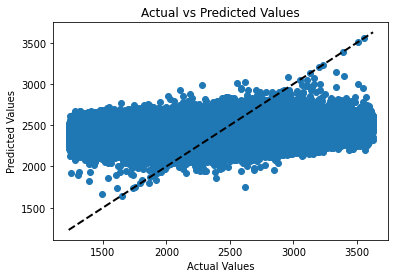

R^2 score: 0.06575872258689774
Mean Squared Error: 171165.6068584002


In [224]:
# Fitting polynomial regression model since the R^2 score is low on the linear regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Taking a sample of the data to make computation possible
sample_df = model_df.sample(frac=0.1, random_state=42)

# Create the feature matrix X and the target variable y
X = sample_df.drop('CUS_VALUE', axis=1)
y = sample_df['CUS_VALUE']

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Create an instance of the LinearRegression model
poly_model = LinearRegression()

# Fit the model to the polynomial features
poly_model.fit(X_poly, y)

# Predict the values
y_pred = poly_model.predict(X_poly)

# Create a scatter plot of actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.show()

# Print the R^2 score
print(f"R^2 score: {poly_model.score(X_poly, y)}")
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance. (10 points)

In [225]:
# Trying regularization models in hopes of improving the R^2 score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

# Create the feature matrix X and the target variable y
X = model_df.drop('CUS_VALUE', axis=1)
y = model_df['CUS_VALUE']

# Define the parameter grid for each model
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0]}
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0]}
elasticnet_param_grid = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}

# Create instances of the Lasso, Ridge, and ElasticNet models
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

# Create instances of the GridSearchCV for each model
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
elasticnet_grid_search = GridSearchCV(elasticnet_model, elasticnet_param_grid, cv=5)

# Fit the models to the data
lasso_grid_search.fit(X, y)
ridge_grid_search.fit(X, y)
elasticnet_grid_search.fit(X, y)

# Get the best hyperparameters and R^2 scores for each model
lasso_best_params = lasso_grid_search.best_params_
lasso_best_score = lasso_grid_search.best_score_

ridge_best_params = ridge_grid_search.best_params_
ridge_best_score = ridge_grid_search.best_score_

elasticnet_best_params = elasticnet_grid_search.best_params_
elasticnet_best_score = elasticnet_grid_search.best_score_

# Create a dataframe with the model name, hyperparameter values, and R^2 scores
results_df = pd.DataFrame({
    'Model': ['Lasso', 'Ridge', 'ElasticNet'],
    'Hyperparameters': [lasso_best_params, ridge_best_params, elasticnet_best_params],
    'R^2 Score': [lasso_best_score, ridge_best_score, elasticnet_best_score]
})

# Print the dataframe
print(results_df)

        Model                  Hyperparameters  R^2 Score
0       Lasso                   {'alpha': 0.1}   0.055388
1       Ridge                  {'alpha': 10.0}   0.055466
2  ElasticNet  {'alpha': 0.1, 'l1_ratio': 0.9}   0.054918


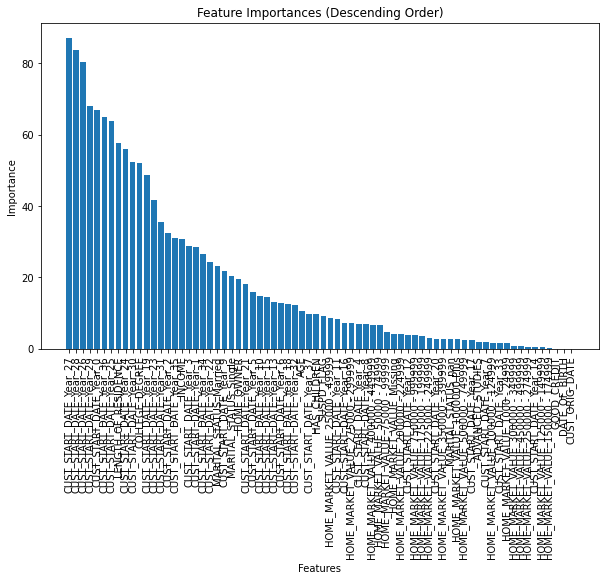

R^2 score: 0.05554313183623705
Mean Squared Error: 173581.7029517762


In [226]:

from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Create the feature matrix X and the target variable y
X = model_df.drop('CUS_VALUE', axis=1)
y = model_df['CUS_VALUE']

# Create an instance of the Ridge model with alpha=10
ridge_model = Ridge(alpha=10)

# Fit the model to the data
ridge_model.fit(X, y)

# Get the feature importances
feature_importances = abs(ridge_model.coef_)

# Get the indices that would sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Sort the feature importances and feature names accordingly
sorted_importances = feature_importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Descending Order)')
plt.xticks(rotation=90)
plt.show()

# Print the R^2 score and mean squared error
r2_score = ridge_model.score(X, y)
mse = mean_squared_error(y, ridge_model.predict(X))
print(f"R^2 score: {r2_score}")
print(f"Mean Squared Error: {mse}")

In [227]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score

# Create the feature matrix X and the target variable y
X = model_df.drop('CUS_VALUE', axis=1)
y = model_df['CUS_VALUE']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBRegressor model
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print(f"R^2 score: {r2}")


R^2 score: 0.05663973157192481


#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

Given the poor performance of every model applied to predict customer value, my recommendation is to collect more data on the customers. The characteristics provide very little information about the customer value. The models built to predict this are only capable of predicting around 5% of the variation in customer value. Even the best model (ploynomial) could not provide an R^2 higher than 6.3%. The mean squared errors are very high as well. Based on the feature importance, extracted from Ridge regression, CUST_START_DATE seems important, additional data related to this could improve the model performance. If the company is able to retrieve data, that is more correlated with the target variable, many application scenarios could arise. In terms of marketing, the company can target those individuals with high customer value, hereby achieving more profit for the cost of a marketing campaign.

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)

In [228]:
churn_df = df.drop(['INDIVIDUAL_ID', 'ADDRESS_ID', 'SOCIAL_SECURITY_NUMBER', 'SUSPD_DATE'], axis=1)
{col: [churn_df[col].isnull().sum(), f'% {np.round(np.mean(churn_df[col].isnull()*100), 3)}'
      ] for col in churn_df.columns if churn_df[col].isnull().any()}

suspension_percentage = (churn_df['SUSPD_FLAG'] == 1).mean() * 100
print(f"Percentage of 1s in SUSPD_FLAG: {suspension_percentage}%")



Percentage of 1s in SUSPD_FLAG: 11.463526182211016%


In [229]:
# Applying SMOTE for addressing class imbalance and improving the model performance
from imblearn.over_sampling import SMOTE

# Separate the features and target variable
X = churn_df.drop('SUSPD_FLAG', axis=1)
y = churn_df['SUSPD_FLAG']

# Apply SMOTE to the minority class
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Create a new dataframe with the SMOTE samples
churn_smote_df = pd.concat([X_smote, y_smote], axis=1)


In [230]:
# Check the class distribution after applying SMOTE
suspension_percentage = (churn_smote_df['SUSPD_FLAG'] == 1).mean() * 100
print(f"Percentage of 1s in SUSPD_FLAG: {suspension_percentage}%")

Percentage of 1s in SUSPD_FLAG: 50.0%


Accuracy: 0.6265382196742603
Precision: 0.617563158335065
Recall: 0.6692912234314812
F1 Score: 0.6423875267392438
Confusion Matrix:


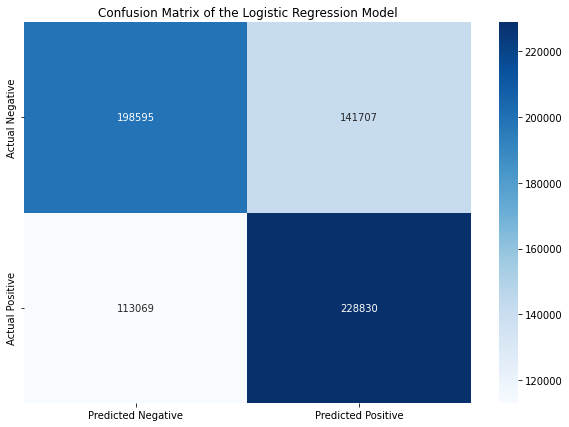

In [231]:
# Fitting a basic logistic regression model to classify the suspended accounts
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Fitting a basic logistic regression model to classify the suspended accounts
# Separate the features and target variable
X = churn_smote_df.drop('SUSPD_FLAG', axis=1)
y = churn_smote_df['SUSPD_FLAG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LogisticRegression model
log_model = LogisticRegression()

# Fit the model to the training data
log_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = log_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the performance scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"])

# Create a heatmap from the DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')

# Add a title to the plot
plt.title("Confusion Matrix of the Logistic Regression Model")

# Show the plot
plt.show()


#### Q3.2 Build a second model and compare the model performance. (15 points)

In [232]:
from sklearn.tree import DecisionTreeClassifier

# Separate the features and target variable
X = churn_smote_df.drop('SUSPD_FLAG', axis=1)
y = churn_smote_df['SUSPD_FLAG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier model
tree_model = DecisionTreeClassifier()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the performance scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8959016477548406
Precision: 0.8903944542925908
Recall: 0.9035095159681661
F1 Score: 0.8969040436447678


In [57]:
# Optimize the hyperparameters of the DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Separate the features and target variable
X = churn_smote_df.drop('SUSPD_FLAG', axis=1)
y = churn_smote_df['SUSPD_FLAG']

# Define the parameter grid for the DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of the DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Create an instance of the GridSearchCV for the DecisionTreeClassifier
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and best score
print("Best Hyperparameters:")
print(best_params)
print("Best Score:")
print(best_score)


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score:
0.8989431541469319


Accuracy: 0.9150015904403541
Precision: 0.9322288835638753
Recall: 0.8955013030163879
F1 Score: 0.9134960795312147


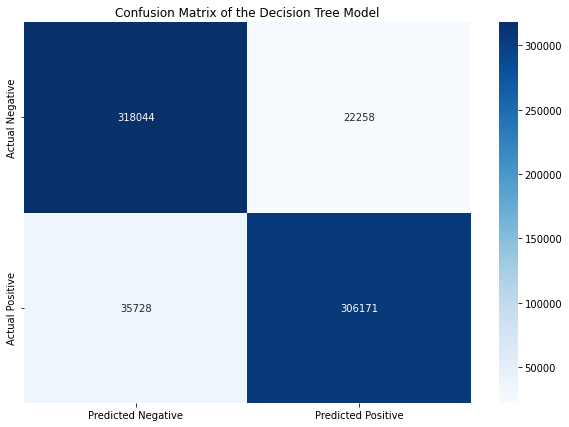

In [233]:
# Optimized Decision Tree Model with hyperparameters from previous cell

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the features and target variable
X = churn_smote_df.drop('SUSPD_FLAG', axis=1)
y = churn_smote_df['SUSPD_FLAG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier model with specified hyperparameters
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=4, min_samples_split=10)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the performance scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"])

# Create a heatmap from the DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')

# Add a title to the plot
plt.title("Confusion Matrix of the Decision Tree Model")

# Show the plot
plt.show()

Accuracy: 0.9331223495714606
Precision: 0.9679410436139532
Recall: 0.8962412876317275
F1 Score: 0.9307123157856371


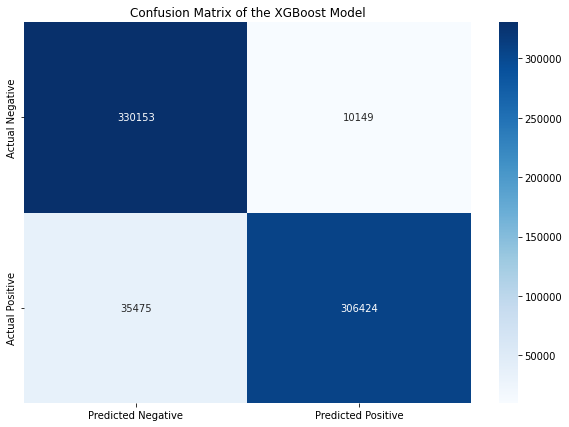

In [234]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBClassifier model
xgb_model = XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the performance scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"])

# Create a heatmap from the DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')

# Add a title to the plot
plt.title("Confusion Matrix of the XGBoost Model")

# Show the plot
plt.show()

#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

My model suggestion for the head of marketing to predict customer churn is the xgboost. This model was capable of delivering outstanding scores, including an accuracy of 93.31%, precision of 96.79%, recall of 89.62%, and an F1 Score of 93.07%. The near 90% recall indicates the model's effectiveness in identifying customers at risk of churn with high precision. The confusion matrix also shows that the number of false negatives is relatively low, and the model can confidently identify accounts at risk, outperforming the baseline model in every aspect.

In addition to its exceptional performance, the xgboost model provides valuable insights into feature importance. Understanding which features contribute most to the predictions allows for a deeper understanding of customer behavior. The model's scalability and efficiency make it suitable for handling larger datasets efficiently, aligning with the company's potential growth. Moreover, the robustness and generalization capabilities of xgboost ensure consistent performance across different subsets of the data, instilling confidence in its reliability.

While xgboost's complexity is acknowledged, efforts for model interpretability are in place to facilitate understanding of its decisions. Implementation considerations include evaluating the ease of integrating the xgboost model into existing systems, along with potential challenges and the required level of expertise. Leveraging the xgboost model will empower the company to proactively intervene with customers at high risk of suspending their accounts, ultimately resulting in higher customer satisfaction and cost savings, given the model's precision of over 96% for flagged at-risk customers.